In [14]:
!pip install yfinance

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


In [42]:
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'DOGE-USD']
data = yf.download(cryptocurrencies,start='2022-01-01', end='2024-08-31')
data.head()

[*********************100%***********************]  6 of 6 completed


Price                       Adj Close                                       \
Ticker                        BNB-USD       BTC-USD  DOGE-USD      ETH-USD   
Date                                                                         
2022-01-01 00:00:00+00:00  527.352722  47686.812500  0.173035  3769.697021   
2022-01-02 00:00:00+00:00  531.396667  47345.218750  0.174403  3829.564941   
2022-01-03 00:00:00+00:00  512.135986  46458.117188  0.170088  3761.380371   
2022-01-04 00:00:00+00:00  507.506104  45897.574219  0.168803  3794.056641   
2022-01-05 00:00:00+00:00  475.056946  43569.003906  0.159420  3550.386963   

Price                                                 Close                \
Ticker                        SOL-USD   XRP-USD     BNB-USD       BTC-USD   
Date                                                                        
2022-01-01 00:00:00+00:00  178.517944  0.849472  527.352722  47686.812500   
2022-01-02 00:00:00+00:00  176.382843  0.859118  531.396667  47345.218750   
2022-01-03 00:00:00+00:00  170.297745  0.832885  512.135986  46458.117188   
2022-01-04 00:00:00+00:00  167.938904  0.824673  507.506104  45897.574219   
2022-01-05 00:00:00+00:00  155.099731  0.774358  475.056946  43569.003906   

Price                                             ...      Open               \
Ticker                     DOGE-USD      ETH-USD  ...  DOGE-USD      ETH-USD   
Date                                              ...                          
2022-01-01 00:00:00+00:00  0.173035  3769.697021  ...  0.170510  3683.047119   
2022-01-02 00:00:00+00:00  0.174403  3829.564941  ...  0.173027  3769.298340   
2022-01-03 00:00:00+00:00  0.170088  3761.380371  ...  0.174406  3829.535645   
2022-01-04 00:00:00+00:00  0.168803  3794.056641  ...  0.170151  3761.361572   
2022-01-05 00:00:00+00:00  0.159420  3550.386963  ...  0.168835  3794.269043   

Price                                                Volume               \
Ticker                        SOL-USD   XRP-USD     BNB-USD      BTC-USD   
Date                                                                       
2022-01-01 00:00:00+00:00  170.310837  0.831281  1622547014  24582667004   
2022-01-02 00:00:00+00:00  178.532410  0.849442  1462276185  27951569547   
2022-01-03 00:00:00+00:00  176.386307  0.859107  1949153130  33071628362   
2022-01-04 00:00:00+00:00  170.286118  0.832851  2200879165  42494677905   
2022-01-05 00:00:00+00:00  167.940338  0.824714  2870757788  36851084859   

Price                                                                      
Ticker                      DOGE-USD      ETH-USD     SOL-USD     XRP-USD  
Date                                                                       
2022-01-01 00:00:00+00:00  371336089   9776191466  1084780603  1156464024  
2022-01-02 00:00:00+00:00  391041933   9881471548   995389409  1134033205  
2022-01-03 00:00:00+00:00  505900382  12080777893  1345778058  1428968710  
2022-01-04 00:00:00+00:00  541922892  14030925983  1499265336  1514079366  
2022-01-05 00:00:00+00:00  994086848  18061338502  2123759721  2252733064  

[5 rows x 36 columns]

In [16]:
returns = adj_close.pct_change().dropna(axis=0)

In [45]:
data['BTC-Volatility'] = returns['BTC-USD'].rolling(window=30).std() * np.sqrt(30)
data['ETH-Volatility'] = returns['ETH-USD'].rolling(window=30).std() * np.sqrt(30)
data['XRP-Volatility'] = returns['XRP-USD'].rolling(window=30).std() * np.sqrt(30)
data['DOGE-Volatility'] = returns['DOGE-USD'].rolling(window=30).std() * np.sqrt(30)
data['BNB-Volatility'] = returns['BNB-USD'].rolling(window=30).std() * np.sqrt(30)
data['SOL-Volatility'] = returns['SOL-USD'].rolling(window=30).std() * np.sqrt(30)

btc_avg_volatility = data['BTC-Volatility'].mean()
eth_avg_volatility = data['ETH-Volatility'].mean()
xrp_avg_volatility = data['XRP-Volatility'].mean()
doge_avg_volatility = data['DOGE-Volatility'].mean()
bnb_avg_volatility = data['BNB-Volatility'].mean()
sol_avg_volatility = data['SOL-Volatility'].mean()

avg_volatilities = {
    'BTC': btc_avg_volatility,
    'ETH': eth_avg_volatility,
    'XRP': xrp_avg_volatility,
    'DOGE': doge_avg_volatility,
    'BNB': bnb_avg_volatility,
    'SOL': sol_avg_volatility
}

sorted_volatilities = sorted(avg_volatilities.items(), key=lambda item: item[1], reverse=True)
for crypto, volatility in sorted_volatilities:
    print(f"{crypto} Average Volatility: {volatility}")

SOL Average Volatility: 0.28106325265515986
DOGE Average Volatility: 0.23898065020644232
XRP Average Volatility: 0.21099418899188907
ETH Average Volatility: 0.1832994284806239
BNB Average Volatility: 0.16197750432982475
BTC Average Volatility: 0.15019137000495625


In [18]:
adj_close = data['Adj Close']
adj_close.head()

Ticker,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,,,
2022-01-01 00:00:00+00:00,527.352722,47686.812500,0.173035,3769.697021,178.517944,0.849472
2022-01-02 00:00:00+00:00,531.396667,47345.218750,0.174403,3829.564941,176.382843,0.859118
2022-01-03 00:00:00+00:00,512.135986,46458.117188,0.170088,3761.380371,170.297745,0.832885
2022-01-04 00:00:00+00:00,507.506104,45897.574219,0.168803,3794.056641,167.938904,0.824673
2022-01-05 00:00:00+00:00,475.056946,43569.003906,0.159420,3550.386963,155.099731,0.774358


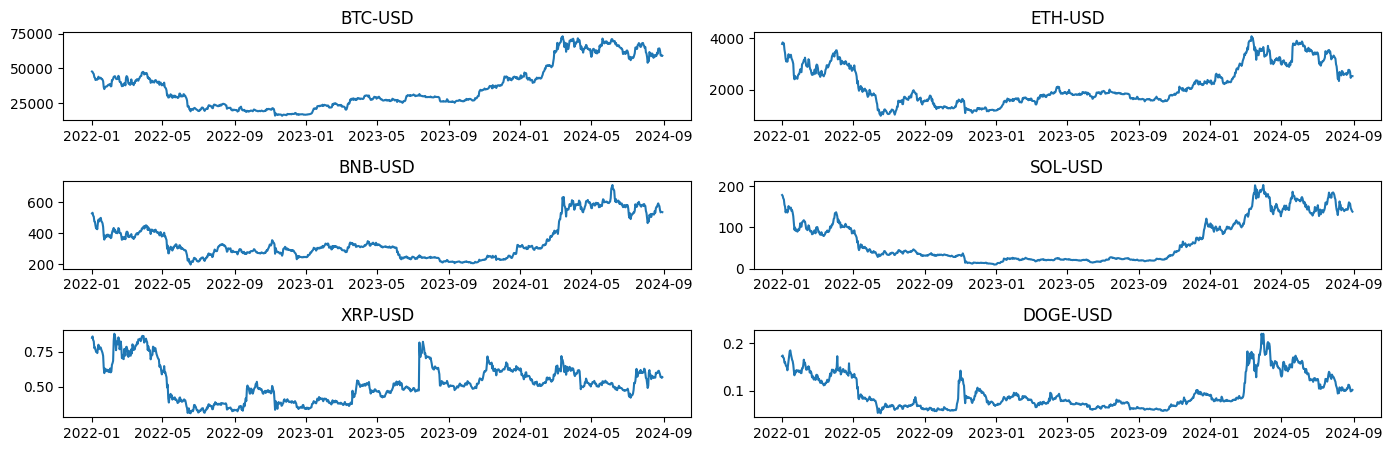

In [31]:
fig,axs = plt.subplots(3,2, figsize = (17,5), gridspec_kw={'wspace': 0.1, 'hspace': 0.7})
axs[0,0].plot(adj_close['BTC-USD'])
axs[0,0].set_title('BTC-USD')

axs[0,1].plot(adj_close['ETH-USD'])
axs[0,1].set_title('ETH-USD')

axs[1,0].plot(adj_close['BNB-USD'])
axs[1,0].set_title('BNB-USD')

axs[1,1].plot(adj_close['SOL-USD'])
axs[1,1].set_title('SOL-USD')

axs[2,0].plot(adj_close['XRP-USD'])
axs[2,0].set_title('XRP-USD')

axs[2,1].plot(adj_close['DOGE-USD'])
axs[2,1].set_title('DOGE-USD')


plt.show()

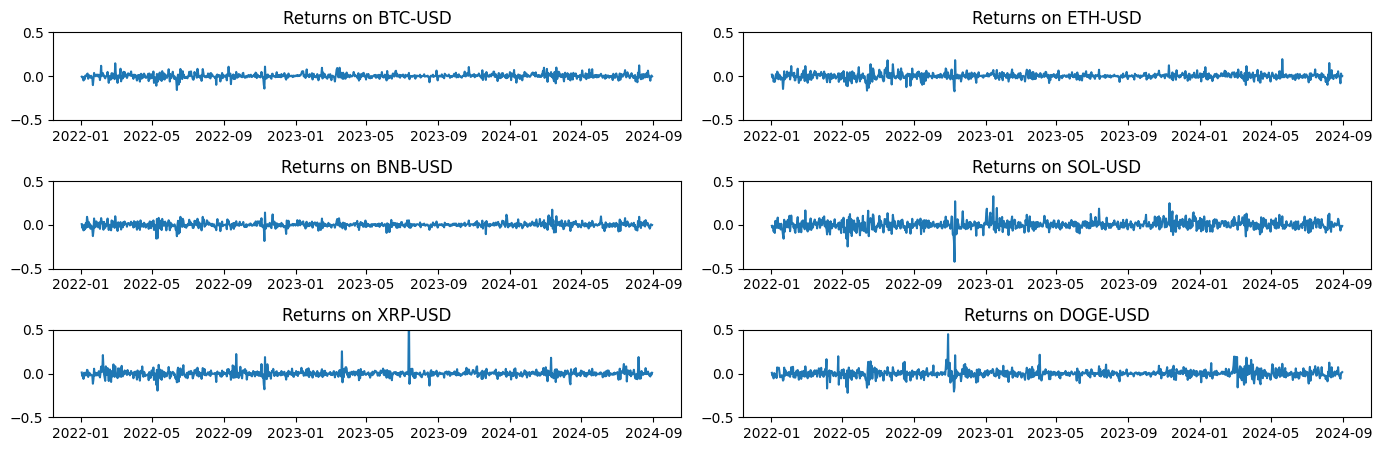

In [79]:
fig,axs = plt.subplots(3,2, figsize = (17,5), gridspec_kw={'wspace': 0.1, 'hspace': 0.7})
y_lim_min, y_lim_max = -0.5, 0.5
for ax in axs.flatten():
    ax.set_ylim(y_lim_min, y_lim_max)
axs[0,0].plot(returns['BTC-USD'])
axs[0,0].set_title('Returns on BTC-USD')

axs[0,1].plot(returns['ETH-USD'])
axs[0,1].set_title('Returns on ETH-USD')

axs[1,0].plot(returns['BNB-USD'])
axs[1,0].set_title('Returns on BNB-USD')

axs[1,1].plot(returns['SOL-USD'])
axs[1,1].set_title('Returns on SOL-USD')

axs[2,0].plot(returns['XRP-USD'])
axs[2,0].set_title('Returns on XRP-USD')

axs[2,1].plot(returns['DOGE-USD'])
axs[2,1].set_title('Returns on DOGE-USD')

plt.show()

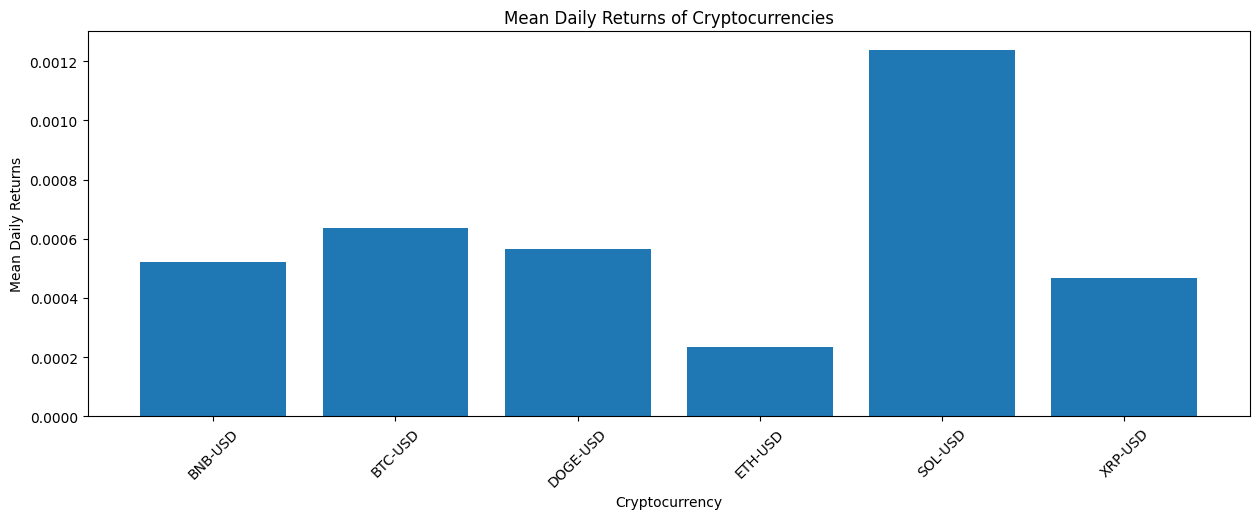

In [69]:
mean_returns = returns.mean()

# Plot the mean returns
plt.figure(figsize=(15, 5))
plt.bar(mean_returns.index, mean_returns.values)
plt.xlabel('Cryptocurrency')
plt.ylabel('Mean Daily Returns')
plt.title('Mean Daily Returns of Cryptocurrencies')
plt.xticks(rotation=45)
plt.show()

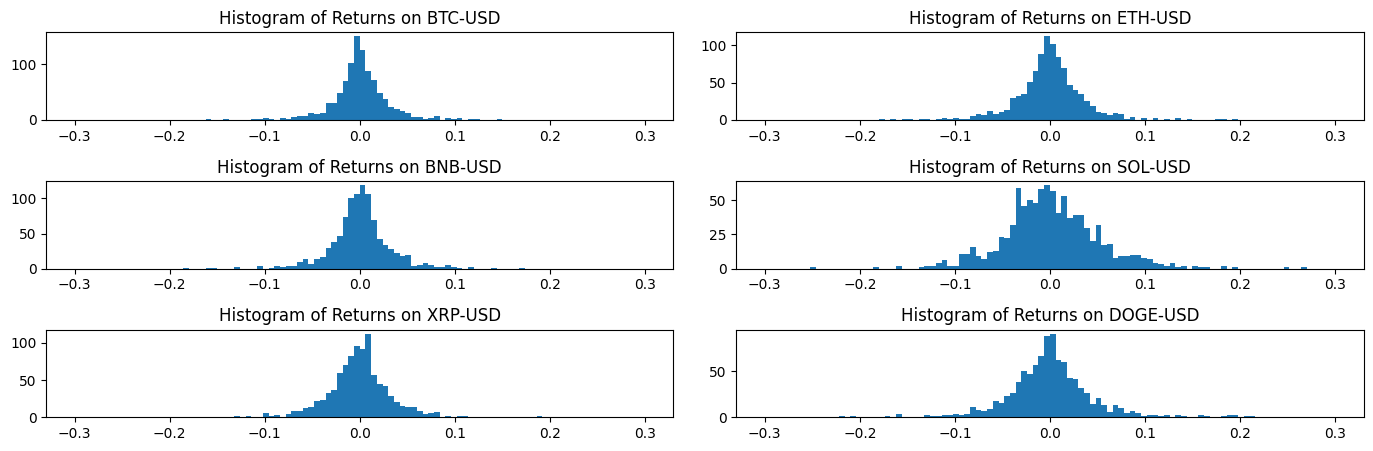

In [56]:
fig,axs = plt.subplots(3,2, figsize = (17,5), gridspec_kw={'wspace': 0.1, 'hspace': 0.7})
axs[0,0].hist(returns['BTC-USD'], bins = 100, range = (-0.3,0.3))
axs[0,0].set_title('Histogram of Returns on BTC-USD')

axs[0,1].hist(returns['ETH-USD'], bins = 100, range = (-0.3,0.3))
axs[0,1].set_title('Histogram of Returns on ETH-USD')

axs[1,0].hist(returns['BNB-USD'], bins = 100, range = (-0.3,0.3))
axs[1,0].set_title('Histogram of Returns on BNB-USD')

axs[1,1].hist(returns['SOL-USD'], bins = 100, range = (-0.3,0.3))
axs[1,1].set_title('Histogram of Returns on SOL-USD')

axs[2,0].hist(returns['XRP-USD'], bins = 100, range = (-0.3,0.3))
axs[2,0].set_title('Histogram of Returns on XRP-USD')

axs[2,1].hist(returns['DOGE-USD'], bins = 100, range = (-0.3,0.3))
axs[2,1].set_title('Histogram of Returns on DOGE-USD')

plt.show()

<Axes: xlabel='Ticker', ylabel='Ticker'>

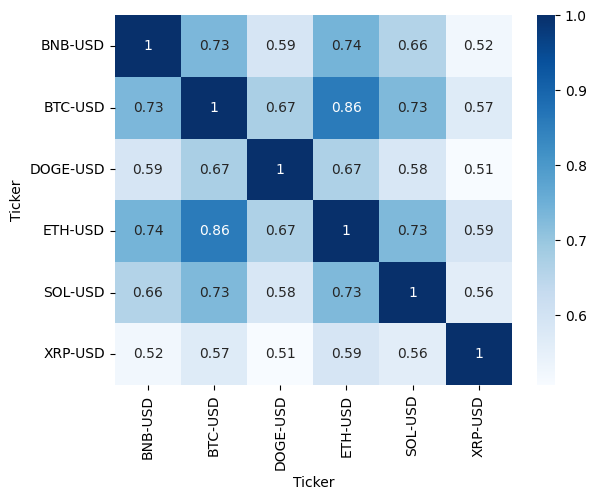

In [22]:
corr = returns.corr()
sns.heatmap(corr, annot=True, cmap= 'Blues')


In [23]:
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
print(sharpe_ratio)

Ticker
BNB-USD     0.261249
BTC-USD     0.350683
DOGE-USD    0.188223
ETH-USD     0.103561
SOL-USD     0.360890
XRP-USD     0.167882
dtype: float64
